In [1]:
from docx import Document
import os

In [2]:
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings

warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [3]:
from bertopic import BERTopic
import numpy as np
from time import sleep
import pickle
import os
import gensim
from nltk.stem import WordNetLemmatizer

In [4]:
def get_ques_list(folder):
    os.chdir(folder)
    list_of_files = os.listdir()
    all_ques = {}
    for filename in list_of_files:
        if(filename[len(filename)-5:] == '.docx'):
            doc = Document(filename)
            # print(filename)
            # print(doc)

            fullText = []
            for para in doc.paragraphs:
                # print(para.text)
                fullText.append(para.text)
            # doctxt =  '\n'.join(fullText)
            doctxt = fullText
            fullText = []
            for eachl in doctxt:
                # print(eachl)
                if len(eachl) == 0:
                    continue
                elif eachl[0] == 'Q':
                    fullText.append(eachl.split(" ", 1)[1])   # for networking "." -> " "
                else:
                    fullText[len(fullText)-1] = fullText[len(fullText)-1] + ' ' + eachl

            all_ques[filename[:len(filename)-5]] = fullText
            # all_ques = all_ques + fullText
            # print(doctxt)
            # print(fullText)
    os.chdir("..")
    return all_ques

In [5]:
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')

# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 1:         # for networking > 1
            result.append(ls(token))
    result = ' '.join(result)
    return result

In [6]:
def check_for(folder):
    ques_list_per_company = get_ques_list(folder)
    os.chdir(folder)
    print(os.getcwd(), '\n Now importing model\n')

    model = BERTopic.load('model_merged_ngram_len_2')     # default stored using 'model_cpu'

    for key, value in ques_list_per_company.items():
        print("For company : ", key)
        ques_list = value
        for ques in ques_list:
            print("Before prepro : ", ques)
            # for predicting the topics for any new sentence
#             new_check = pp(ques)
            new_check = ques
            print("After prepro : ", new_check)

            #  Find topics
            num_of_topics = 3
            similar_topics, similarity = model.find_topics(new_check, top_n=num_of_topics)

            print(
                f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity, 2)}')

            # for printing those 3 topics
            for index, top in enumerate(similar_topics):
                keys = [t[0] for t in model.get_topic(top)]
                print(f'{keys} : with probability \n{np.round(similarity, 2)[index]}')

            print()
            sleep(1)
    print()
    print()

    os.chdir('..')

In [7]:
os.chdir("theory")


In [8]:
print(os.getcwd())           # model : model_cpu_len_gt_2  ,  preprocessing : len > 2
check_for("DBMS")

C:\Users\KRG\Desktop\github_repo_placement\placement_analysis\theory
C:\Users\KRG\Desktop\github_repo_placement\placement_analysis\theory\DBMS 
 Now importing model

For company :  amazon
Before prepro :  What is DBMS?
After prepro :  What is DBMS?
The top 3 similar topics are [5, 439, 172], and the similarities are [0.52 0.45 0.42]
['dbms', 'interface', 'ibm', 'application', 'software', 'user interface', 'tool', 'database', 'system', 'user'] : with probability 
0.52
['psm', 'sql psm', 'stored procedure', 'database stored procedure', 'procedure', 'procedure sql psm', 'stored procedure sql', 'module', 'database stored', 'procedure sql'] : with probability 
0.45
['administrator', 'database administrator', 'administrator database', 'user', 'database administrator database', 'database user', 'user database', 'dba', 'database', 'user database administrator'] : with probability 
0.42

Before prepro :  What is Database?
After prepro :  What is Database?
The top 3 similar topics are [328, 172,

Before prepro :  What is a database system?
After prepro :  What is a database system?
The top 3 similar topics are [328, 75, 184], and the similarities are [0.62 0.58 0.58]
['database programming', 'approach database programming', 'approach database', 'database programming technique', 'programming', 'main approach database', 'programming technique', 'main approach', 'approach', 'lowlevel'] : with probability 
0.62
['parallel', 'parallel database', 'parallel database system', 'architecture', 'database system', 'parallel architecture', 'system', 'machine', 'architecture database', 'teradata'] : with probability 
0.58
['physical database design', 'physical database', 'physical', 'database design', 'design', 'physical design', 'factor influence', 'database design discus', 'rdbmss', 'factor'] : with probability 
0.58

Before prepro :  What do you mean by Data Model?
After prepro :  What do you mean by Data Model?
The top 3 similar topics are [369, 27, 440], and the similarities are [0.62 0

Before prepro :  What do you understand by the terms Entity, Entity Type, and Entity Set in DBMS?
After prepro :  What do you understand by the terms Entity, Entity Type, and Entity Set in DBMS?
The top 3 similar topics are [159, 116, 481], and the similarities are [0.61 0.46 0.45]
['entity', 'entity set', 'entity entity', 'entity entity set', 'attribute entity', 'set', 'entity set attribute', 'set attribute', 'entity type entity', 'set entity'] : with probability 
0.61
['lowerlevel entity', 'lowerlevel entity set', 'lowerlevel', 'entity set', 'higherlevel entity', 'higherlevel', 'entity', 'higherlevel entity set', 'set', 'set lowerlevel entity'] : with probability 
0.46
['notion', 'attribute operation', 'notion key', 'section define', 'notion value', 'notion value variable', 'instance corresponds', 'identity interesting relationship', 'notion key relationship', 'instance corresponds notion'] : with probability 
0.45

Before prepro :  What do you mean by transparent DBMS?
After prepro 

Before prepro :  the concept of database backups and recovery strategies.
After prepro :  the concept of database backups and recovery strategies.
The top 3 similar topics are [164, 468, 328], and the similarities are [0.53 0.5  0.48]
['recovery', 'recovery algorithm', 'recovery algorithm section', 'recovery scheme', 'algorithm section', 'section recovery', 'recovery technique', 'mohan', 'backed', 'mohan narang describes'] : with probability 
0.53
['chapter recovery', 'recovery chapter', 'recovery', 'chapter recovery chapter', 'recovery chapter recovery', 'disk page', 'chapter', 'recovery term', 'recovery technique item', 'failure chapter recovery'] : with probability 
0.5
['database programming', 'approach database programming', 'approach database', 'database programming technique', 'programming', 'main approach database', 'programming technique', 'main approach', 'approach', 'lowlevel'] : with probability 
0.48

Before prepro :  a database schema.
After prepro :  a database schema.
T

Before prepro :  does a Database Management System (DBMS) handle data integrity constraints, such as primary keys, foreign keys, and check constraints, to ensure data accuracy and consistency in a relational database?
After prepro :  does a Database Management System (DBMS) handle data integrity constraints, such as primary keys, foreign keys, and check constraints, to ensure data accuracy and consistency in a relational database?
The top 3 similar topics are [46, 224, 108], and the similarities are [0.51 0.48 0.33]
['integrity', 'integrity constraint', 'constraint', 'referential integrity', 'referential', 'referential integrity constraint', 'constraint specified', 'integrity constraint specified', 'specified', 'constraint database'] : with probability 
0.51
['consistency', 'inconsistency', 'consistency requirement', 'level consistency', 'consistent state', 'database consistent state', 'database consistent', 'ensure change database', 'constraint ensure change', 'requirement subtables']

Before prepro :  are the various backup and recovery strategies implemented by a DBMS, including full backups, incremental backups, differential backups, and point-in-time recovery, and how do they ensure data availability and data loss prevention?
After prepro :  are the various backup and recovery strategies implemented by a DBMS, including full backups, incremental backups, differential backups, and point-in-time recovery, and how do they ensure data availability and data loss prevention?
The top 3 similar topics are [164, 118, 468], and the similarities are [0.4  0.36 0.34]
['recovery', 'recovery algorithm', 'recovery algorithm section', 'recovery scheme', 'algorithm section', 'section recovery', 'recovery technique', 'mohan', 'backed', 'mohan narang describes'] : with probability 
0.4
['backup', 'remote backup', 'remote', 'backup site', 'remote backup site', 'backup system', 'remote backup system', 'site', 'primary site', 'primary'] : with probability 
0.36
['chapter recovery', 'r

Before prepro :  database indexing and its impact on query performance.
After prepro :  database indexing and its impact on query performance.
The top 3 similar topics are [376, 409, 1], and the similarities are [0.63 0.57 0.54]
['storage indexing', 'indexing', 'storage', 'index storage', 'index storage indexing', 'column based storage', 'column based', 'based storage', 'indexing structure', 'column'] : with probability 
0.63
['indexing hashing', 'chapter indexing hashing', 'chapter indexing', 'indexing', 'hashing', 'indexing hashing hash', 'hashing hash', 'small chapter indexing', 'small chapter', 'index chapter indexing'] : with probability 
0.57
['index', 'secondary index', 'secondary', 'search', 'clustering index', 'clustering', 'primary index', 'field', 'dense', 'file'] : with probability 
0.54

Before prepro :  the role of a database administrator (DBA) briefly.
After prepro :  the role of a database administrator (DBA) briefly.
The top 3 similar topics are [172, 5, 298], and the

Before prepro :  database mirroring and its use in high availability.
After prepro :  database mirroring and its use in high availability.
The top 3 similar topics are [23, 355, 75], and the similarities are [0.51 0.5  0.46]
['distributed database', 'distributed', 'autonomy', 'federated', 'heterogeneous', 'chapter distributed database', 'chapter distributed', 'centralized', 'federated database', 'ddbms'] : with probability 
0.51
['datastorage', 'cloud', 'datastorage system', 'cloudbased', 'data storage', 'system cloud', 'amazon', 'architecture datastorage', 'architecture cloud', 'datastorage system support'] : with probability 
0.5
['parallel', 'parallel database', 'parallel database system', 'architecture', 'database system', 'parallel architecture', 'system', 'machine', 'architecture database', 'teradata'] : with probability 
0.46

Before prepro :  database partitioning and its benefits in performance optimization.
After prepro :  database partitioning and its benefits in performance

Before prepro :  the concept of database triggers in a DBMS and their use in automating specific actions or enforcing business rules based on predefined conditions, such as before or after data modification operations (INSERT, UPDATE, DELETE).
After prepro :  the concept of database triggers in a DBMS and their use in automating specific actions or enforcing business rules based on predefined conditions, such as before or after data modification operations (INSERT, UPDATE, DELETE).
The top 3 similar topics are [16, 328, 172], and the similarities are [0.45 0.43 0.39]
['trigger', 'event', 'rule', 'active', 'action', 'triggering', 'active rule', 'statement level', 'time slot', 'trigger trigger'] : with probability 
0.45
['database programming', 'approach database programming', 'approach database', 'database programming technique', 'programming', 'main approach database', 'programming technique', 'main approach', 'approach', 'lowlevel'] : with probability 
0.43
['administrator', 'database

Before prepro :  Given a users table, write a query to get the cumulative number of new users added by day, with the total reset every month.
After prepro :  Given a users table, write a query to get the cumulative number of new users added by day, with the total reset every month.
The top 3 similar topics are [13, 284, 394], and the similarities are [0.31 0.27 0.27]
['aggregate', 'aggregate function', 'group', 'aggregation', 'count', 'grouping', 'function', 'sum', 'group clause', 'aggregation operation'] : with probability 
0.31
['create table', 'table', 'create table command', 'create', 'stand table', 'table command', 'table book', 'command create table', 'table create table', 'table command create'] : with probability 
0.27
['profiler', 'sql profiler', 'trace', 'profile', 'statement', 'statement optimized', 'profiler display', 'profiler user', 'sql profiler display', 'sql statement'] : with probability 
0.27

Before prepro :  Given a table of product subscriptions with a subscriptio

Before prepro :  the concept of database denormalization and scenarios where it may be beneficial.
After prepro :  the concept of database denormalization and scenarios where it may be beneficial.
The top 3 similar topics are [184, 328, 234], and the similarities are [0.53 0.51 0.5 ]
['physical database design', 'physical database', 'physical', 'database design', 'design', 'physical design', 'factor influence', 'database design discus', 'rdbmss', 'factor'] : with probability 
0.53
['database programming', 'approach database programming', 'approach database', 'database programming technique', 'programming', 'main approach database', 'programming technique', 'main approach', 'approach', 'lowlevel'] : with probability 
0.51
['normalization', 'denormalization', 'normalized', 'design', 'denormalization performance', 'normalization normalization', 'normal form normalization', 'bad database design', 'series test', 'form normalization'] : with probability 
0.5

Before prepro :  are the differe

Before prepro :  the concept of database partitioning and its benefits in performance optimization.
After prepro :  the concept of database partitioning and its benefits in performance optimization.
The top 3 similar topics are [2, 328, 75], and the similarities are [0.59 0.51 0.49]
['partitioning', 'partition', 'hash', 'partitioned', 'hash join', 'skew', 'processor', 'range partitioning', 'range', 'join'] : with probability 
0.59
['database programming', 'approach database programming', 'approach database', 'database programming technique', 'programming', 'main approach database', 'programming technique', 'main approach', 'approach', 'lowlevel'] : with probability 
0.51
['parallel', 'parallel database', 'parallel database system', 'architecture', 'database system', 'parallel architecture', 'system', 'machine', 'architecture database', 'teradata'] : with probability 
0.49

Before prepro :  are the challenges associated with scaling a database, and how can they be addressed?
After prepr

Before prepro :  database backup and recovery strategies, including full and incremental backups.
After prepro :  database backup and recovery strategies, including full and incremental backups.
The top 3 similar topics are [164, 118, 328], and the similarities are [0.49 0.47 0.46]
['recovery', 'recovery algorithm', 'recovery algorithm section', 'recovery scheme', 'algorithm section', 'section recovery', 'recovery technique', 'mohan', 'backed', 'mohan narang describes'] : with probability 
0.49
['backup', 'remote backup', 'remote', 'backup site', 'remote backup site', 'backup system', 'remote backup system', 'site', 'primary site', 'primary'] : with probability 
0.47
['database programming', 'approach database programming', 'approach database', 'database programming technique', 'programming', 'main approach database', 'programming technique', 'main approach', 'approach', 'lowlevel'] : with probability 
0.46

Before prepro :  does a distributed database system differ from a centralized 

Before prepro :  you explain the role of a database management system (DBMS) and how it manages data?
After prepro :  you explain the role of a database management system (DBMS) and how it manages data?
The top 3 similar topics are [172, 5, 328], and the similarities are [0.54 0.5  0.49]
['administrator', 'database administrator', 'administrator database', 'user', 'database administrator database', 'database user', 'user database', 'dba', 'database', 'user database administrator'] : with probability 
0.54
['dbms', 'interface', 'ibm', 'application', 'software', 'user interface', 'tool', 'database', 'system', 'user'] : with probability 
0.5
['database programming', 'approach database programming', 'approach database', 'database programming technique', 'programming', 'main approach database', 'programming technique', 'main approach', 'approach', 'lowlevel'] : with probability 
0.49

Before prepro :  are the advantages and disadvantages of using a relational database management system (RDB

For company :  microsoft
Before prepro :  the process of query optimization in a DBMS, including steps like query parsing, query rewriting, query transformation, and cost-based optimization, and how it improves query performance.
After prepro :  the process of query optimization in a DBMS, including steps like query parsing, query rewriting, query transformation, and cost-based optimization, and how it improves query performance.
The top 3 similar topics are [283, 294, 61], and the similarities are [0.47 0.43 0.42]
['query language', 'language', 'language sql', 'widely query language', 'widely query', 'study widely query', 'study widely', 'query language sql', 'language query', 'query'] : with probability 
0.47
['tuning', 'database tuning', 'workload', 'tuning process', 'tune database', 'guideline database', 'database tuning assistant', 'tuning assistant', 'databasesystem parameter', 'sql tuning'] : with probability 
0.43
['query tree', 'transformation', 'tree', 'rewrite', 'query', 'se

Before prepro :  does a distributed database system differ from a centralized database system?
After prepro :  does a distributed database system differ from a centralized database system?
The top 3 similar topics are [23, 75, 355], and the similarities are [0.62 0.43 0.38]
['distributed database', 'distributed', 'autonomy', 'federated', 'heterogeneous', 'chapter distributed database', 'chapter distributed', 'centralized', 'federated database', 'ddbms'] : with probability 
0.62
['parallel', 'parallel database', 'parallel database system', 'architecture', 'database system', 'parallel architecture', 'system', 'machine', 'architecture database', 'teradata'] : with probability 
0.43
['datastorage', 'cloud', 'datastorage system', 'cloudbased', 'data storage', 'system cloud', 'amazon', 'architecture datastorage', 'architecture cloud', 'datastorage system support'] : with probability 
0.38

Before prepro :  the concept of database normalization and its role in reducing data redundancy.
After 

Before prepro :  the differences between online transaction processing (OLTP) and online analytical processing (OLAP) databases.
After prepro :  the differences between online transaction processing (OLTP) and online analytical processing (OLAP) databases.
The top 3 similar topics are [221, 39, 149], and the similarities are [0.67 0.5  0.41]
['olap', 'processing olap', 'analytical', 'analytical processing olap', 'analytical processing', 'online analytical', 'online analytical processing', 'olap server', 'online', 'analysis service'] : with probability 
0.67
['transaction processing', 'processing', 'transaction', 'concept transaction', 'concept', 'transaction management', 'transaction processing concept', 'processing concept', 'concept theory', 'introduction transaction'] : with probability 
0.5
['global transaction', 'local', 'global', 'site', 'transaction access', 'local transaction', 'multidatabase', 'transaction access data', 'access data site', 'transaction'] : with probability 
0.

Before prepro :  normalization in database design with a brief example.
After prepro :  normalization in database design with a brief example.
The top 3 similar topics are [234, 291, 328], and the similarities are [0.72 0.66 0.54]
['normalization', 'denormalization', 'normalized', 'design', 'denormalization performance', 'normalization normalization', 'normal form normalization', 'bad database design', 'series test', 'form normalization'] : with probability 
0.72
['normalization', 'functional dependency normalization', 'chapter basic functional', 'basic functional', 'normalization relational database', 'normalization relational', 'dependency normalization relational', 'basic functional dependency', 'dependency normalization', 'chapter basic'] : with probability 
0.66
['database programming', 'approach database programming', 'approach database', 'database programming technique', 'programming', 'main approach database', 'programming technique', 'main approach', 'approach', 'lowlevel'] : 

Before prepro :  Given a table of product subscriptions with a subscription start date and end date for each user, write a query that returns true or false whether or not each user has a subscription date range that overlaps with any other user.
After prepro :  Given a table of product subscriptions with a subscription start date and end date for each user, write a query that returns true or false whether or not each user has a subscription date range that overlaps with any other user.
The top 3 similar topics are [52, 311, 313], and the similarities are [0.37 0.34 0.29]
['subqueries', 'subquery', 'nested', 'nested subqueries', 'nested query', 'correlated', 'nested subquery', 'outer query', 'temporary', 'temporary relation'] : with probability 
0.37
['query tree', 'query graph', 'representation query', 'relational algebra', 'represent relational', 'tree', 'graph', 'algebra', 'query', 'internal representation query'] : with probability 
0.34
['query shown figure', 'query shown', 'figure

Before prepro :  you explain the concept of database replication and its benefits and challenges?
After prepro :  you explain the concept of database replication and its benefits and challenges?
The top 3 similar topics are [20, 23, 355], and the similarities are [0.53 0.48 0.46]
['replication', 'replica', 'replicated', 'subscriber', 'site', 'replica data', 'update', 'update replica', 'replica data item', 'propagated'] : with probability 
0.53
['distributed database', 'distributed', 'autonomy', 'federated', 'heterogeneous', 'chapter distributed database', 'chapter distributed', 'centralized', 'federated database', 'ddbms'] : with probability 
0.48
['datastorage', 'cloud', 'datastorage system', 'cloudbased', 'data storage', 'system cloud', 'amazon', 'architecture datastorage', 'architecture cloud', 'datastorage system support'] : with probability 
0.46

Before prepro :  the differences between horizontal and vertical partitioning in database design.
After prepro :  the differences betwe

In [9]:
def get_topic(folder):
    ques_list_per_company = get_ques_list(folder)
    os.chdir(folder)
    print(os.getcwd(), '\n Now importing model\n')

    model = BERTopic.load('model_merged_ngram_len_2')     # default stored using 'model_cpu'
    
    all_topics_per_company = {}
    for key, value in ques_list_per_company.items():
        print("For company : ", key)
        ques_list = value
        one_company_topics = []
        for ques in ques_list:
            # for predicting the topics for any new sentence
            new_check = pp(ques)           # after preprocessing

            #  Find topics
            num_of_topics = 2
            similar_topics, similarity = model.find_topics(new_check, top_n=num_of_topics)
            for topic in similar_topics:
                one_company_topics.append(topic)
        all_topics_per_company[key] = one_company_topics
            
    os.chdir('..')
    return all_topics_per_company

In [10]:
print(os.getcwd())           # model : model_cpu_len_gt_2  ,  preprocessing : len > 2
list_of_topics_per_company = get_topic("DBMS")
list_of_topics_per_company

C:\Users\hp\PycharmProjects\placement\theory
C:\Users\hp\PycharmProjects\placement\theory\DBMS 
 Now importing model

For company :  amazon
For company :  google


{'amazon': [2,
  4,
  2,
  -1,
  2,
  20,
  2,
  16,
  2,
  38,
  2,
  8,
  143,
  29,
  17,
  7,
  21,
  17,
  2,
  4,
  26,
  2,
  2,
  -1,
  174,
  81,
  26,
  40,
  42,
  90,
  2,
  16,
  6,
  196,
  143,
  139,
  176,
  36,
  16,
  2,
  174,
  3,
  16,
  3,
  192,
  2,
  23,
  90,
  2,
  4,
  174,
  -1,
  90,
  16,
  23,
  3,
  142,
  3,
  19,
  37],
 'google': [179,
  90,
  17,
  121,
  21,
  6,
  114,
  94,
  6,
  179,
  32,
  217,
  36,
  179,
  179,
  50,
  69,
  179,
  160,
  179,
  179,
  6,
  19,
  8]}

In [11]:
os.chdir('DBMS')
model = BERTopic.load('model_ngram_len_2')
os.chdir('..')

In [13]:
acronym = {}
tp = model.get_topic_info()
for i in range(len(tp['Topic'])):
    print(tp['Topic'].iloc[i], '  :  ', tp['Count'].iloc[i], "  :  ", tp['Name'].iloc[i])
    acronym[tp['Topic'].iloc[i]] = tp['Name'].iloc[i].split(str(tp['Topic'].iloc[i])+'_')[1].split('_')[0] + '_' + str(tp['Topic'].iloc[i])


-1   :   5105   :   -1_database_attribute_figure_value
0   :   277   :   0_document_search_retrieval_web
1   :   188   :   1_time_temporal_valid_temporal database
2   :   182   :   2_dbms_software_application_database
3   :   176   :   3_subclass_specialization_superclass_entity
4   :   148   :   4_relationship_relationship type_entity_entity type
5   :   143   :   5_relone_english_joyce_alice
6   :   141   :   6_xsd_xml_element_xsd element
7   :   139   :   7_warehouse_data warehouse_data_data warehousing
8   :   135   :   8_lock_item_locking_locked
9   :   121   :   9_schema_conceptual_conceptual schema_design
10   :   120   :   10_node_tree_leaf_leaf node
11   :   117   :   11_spatial_spatial data_spatial database_spatial join
12   :   114   :   12_book_discussion_title_bibliography
13   :   109   :   13_bucket_hashing_hash_hash value
14   :   108   :   14_query_optimization_query optimization_query processing
15   :   104   :   15_rule_trigger_event_active
16   :   103   :   16_key

In [15]:
for key,value in acronym.items():
    print(key, " : ", value)

-1  :  database_-1
0  :  document_0
1  :  time_1
2  :  dbms_2
3  :  subclass_3
4  :  relationship_4
5  :  relone_5
6  :  xsd_6
7  :  warehouse_7
8  :  lock_8
9  :  schema_9
10  :  node_10
11  :  spatial_11
12  :  book_12
13  :  bucket_13
14  :  query_14
15  :  rule_15
16  :  key_16
17  :  distributed_17
18  :  algebra_18
19  :  department_19
20  :  constraint_20
21  :  privilege_21
22  :  length_22
23  :  transaction_23
24  :  tape_24
25  :  salary_25
26  :  normal form_26
27  :  encryption_27
28  :  jdbc_28
29  :  replication_29
30  :  ssn_30
31  :  schedule_31
32  :  privacy_32
33  :  dependency_33
34  :  redo_34
35  :  knowledge_35
36  :  concurrency_36
37  :  itemsets_37
38  :  query tree_38
39  :  aggregate function_39
40  :  object oriented_40
41  :  msec_41
42  :  mining_42
43  :  diagram_43
44  :  image_44
45  :  raid_45
46  :  discus_46
47  :  predicate_47
48  :  phone_48
49  :  file organization_49
50  :  security_50
51  :  program variable_51
52  :  file_52
53  :  cursor_53


In [16]:
topic_len = len(model.get_topic_info())
print(topic_len)

223


In [17]:
for i in range(1, topic_len+1):
    print(i-1," : ",model.get_topic(i-1))

0  :  [('document', 0.026222017536104696), ('search', 0.022551584861808388), ('retrieval', 0.0186969025463149), ('web', 0.018510547753518392), ('information retrieval', 0.017267875852305284), ('term', 0.01577595234511746), ('information', 0.014318787105451094), ('relevance', 0.013026825525644483), ('web search', 0.010804864309111954), ('engine', 0.010290521254635763)]
1  :  [('time', 0.035412559930000906), ('temporal', 0.027505539119001762), ('valid', 0.018607713508966416), ('temporal database', 0.01552792414211794), ('valid time', 0.014899701967928175), ('date', 0.012637452261666864), ('transaction time', 0.011178448972471507), ('state', 0.01071750071924911), ('event', 0.010182441971626975), ('history', 0.009316754485270765)]
2  :  [('dbms', 0.025630327541417867), ('software', 0.018698320444593804), ('application', 0.013788164475757973), ('database', 0.013425637985124136), ('program', 0.009231712698161677), ('environment', 0.008794154352573722), ('access', 0.007586259537303053), ('lar

In [18]:
model.visualize_barchart(top_n_topics=len(model.get_topic_info())-1, n_words=8)

In [19]:
def show_cloud(topics):
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud
    import matplotlib.colors as mcolors
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                            max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                            contour_width=3,contour_color='black')

#     topics = [model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)]
    # print(topics)
    fig, axes = plt.subplots(int(len(topics)**0.5), int(len(topics)**0.5), figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i])
    #     print(topic_words)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=8))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

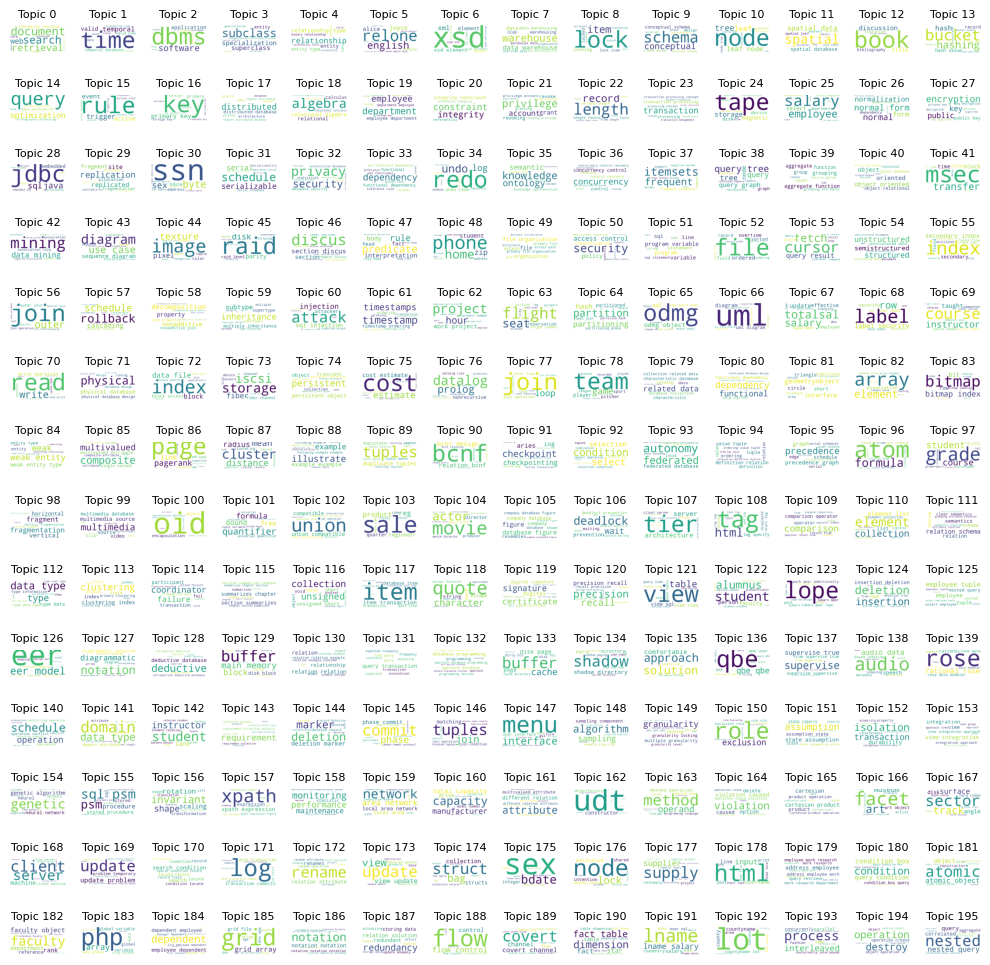

In [20]:
show_cloud([model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)])

In [21]:
from math import ceil
def show_cloud_ceil(topics, topic_numbers):
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud
    import matplotlib.colors as mcolors
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                            max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                            contour_width=3,contour_color='black')

#     topics = [model.get_topic(i) for i in range(0, len(model.get_topic_info())-1)]
    # print(topics)
    fig, axes = plt.subplots(ceil(len(topics)**0.5), ceil(len(topics)**0.5), figsize=(10,10), sharex=True, sharey=True)
    
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        if i >= len(topics):
            fig.delaxes(ax)
            continue
        topic_words = dict(topics[i])
    #     print(topic_words)
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(topic_numbers[i]), fontdict=dict(size=8))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

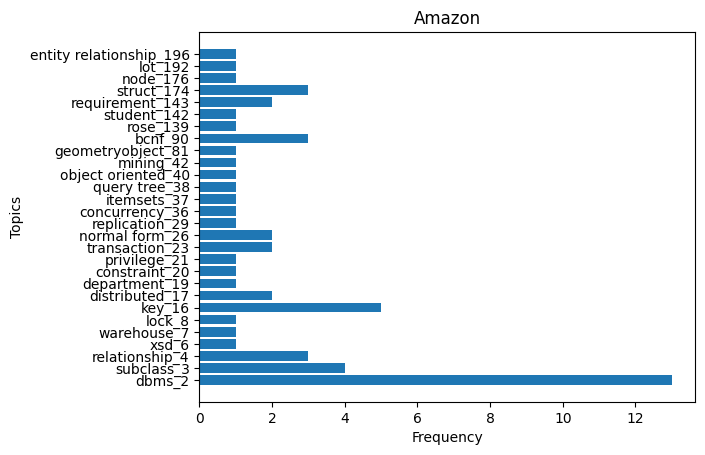

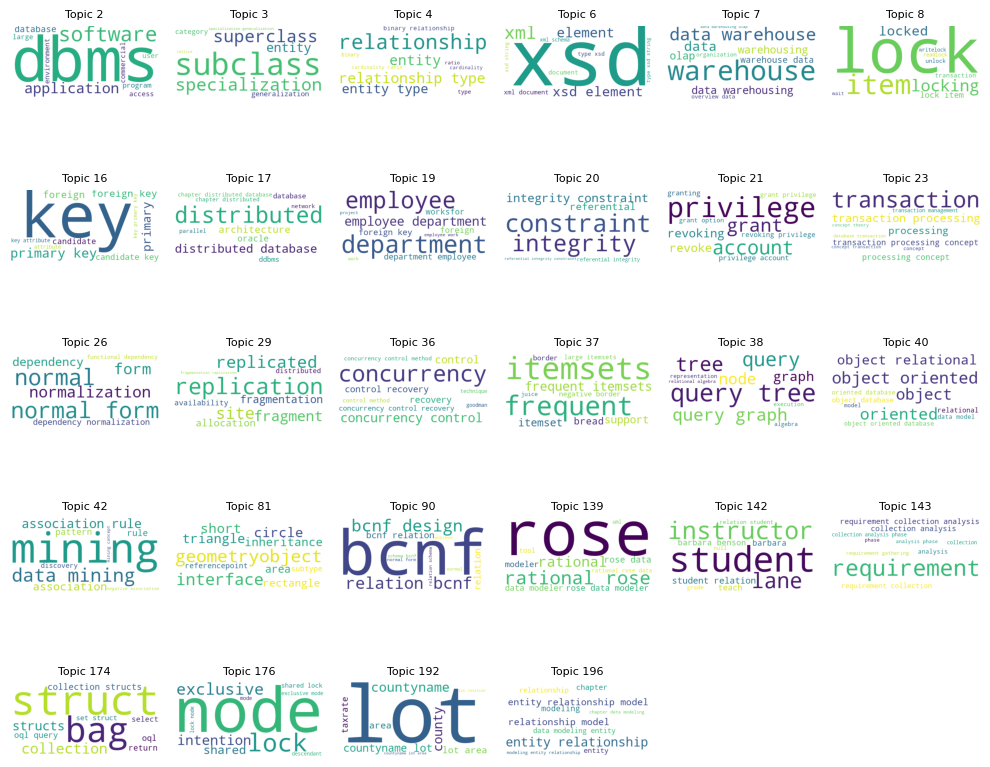

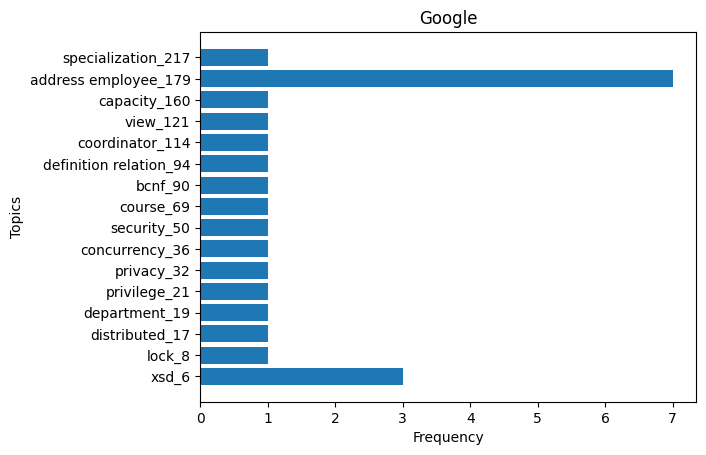

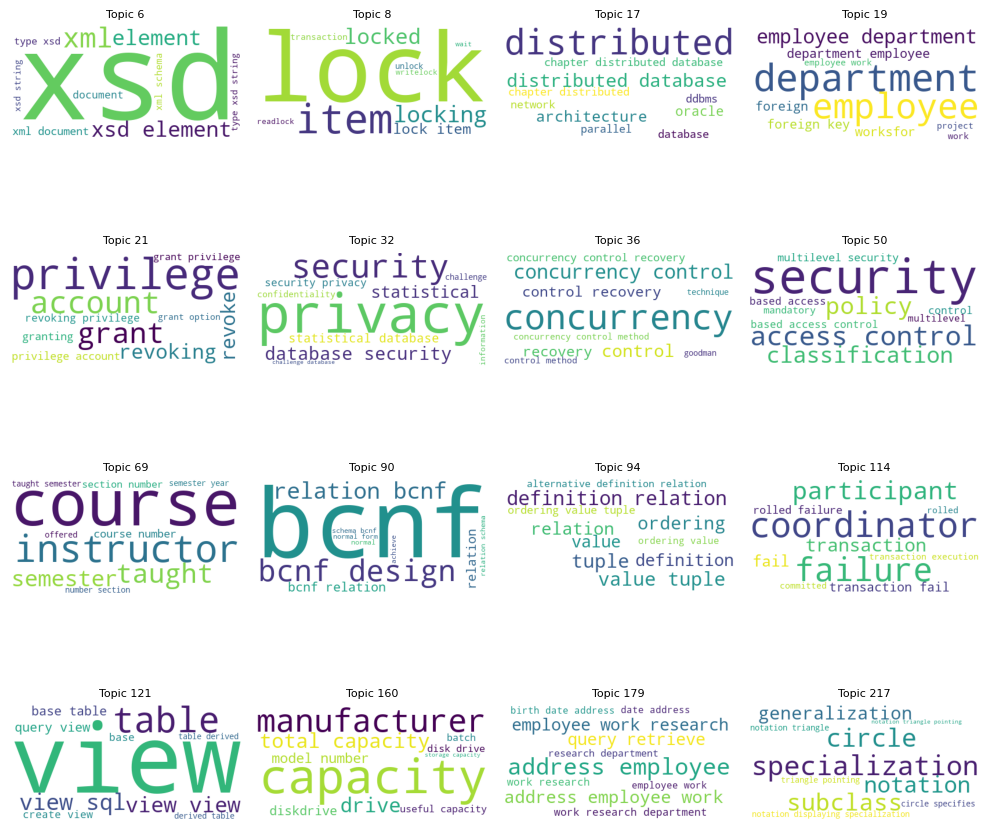

In [22]:
import matplotlib.pyplot as plt

# The given data
data = list_of_topics_per_company

# Extracting unique numbers from the data
unique_numbers = set()
for company_data in data.values():
    unique_numbers.update(set(company_data))
unique_numbers = sorted(list(unique_numbers))

# Counting frequency of each unique number for each company
company_frequencies = {}
for company_name, company_data in data.items():
    company_frequencies[company_name] = {}
    for number in unique_numbers:
        if number == -1:
            continue
        company_frequencies[company_name][number] = company_data.count(number)

# Plotting bar graph for each company
for company_name, company_frequency in company_frequencies.items():
    y_values = [key for key, value in company_frequency.items() if value > 0]
    for_cloud = [model.get_topic(topic_number) for topic_number in y_values]
    topic_numbers = [topic_number for topic_number in y_values]
    x_values = [company_frequency[key] for key in y_values]
    y_values = [acronym[value] for value in y_values]
    plt.barh(y_values, x_values)
    plt.title(company_name.capitalize())
    plt.xlabel('Frequency')
    plt.ylabel('Topics')
    plt.yticks(y_values)
    plt.show()
    show_cloud_ceil(for_cloud, topic_numbers)
